In [1]:
import h5py, sys, os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from datetime import datetime
from scipy import ndimage

%matplotlib widget

from jfunctions import *

In [2]:
#Load simulation data
b, w, zeta, times = load_data('th1_xz', 'w_xz', 'omegaY_xz')
NSAMP = len(times)

# Load simulation metadata
md = get_metadata()

# Load grids
gxf, gyf, gzf, dzf = get_grid(md)
gx, gy, gz, dz = get_grid(md, fractional_grid=False)

Keys: <KeysViewHDF5 ['epsilon_xy', 'epsilon_xz', 'epsilon_yz', 'kappa_t1_xy', 'kappa_t1_xz', 'kappa_t1_yz', 'kappa_t2_xy', 'kappa_t2_xz', 'kappa_t2_yz', 'nlwf_xz', 'nlwf_yz', 'nu_t_xy', 'nu_t_xz', 'nu_t_yz', 'omegaX_xy', 'omegaX_xz', 'omegaX_yz', 'omegaY_xy', 'omegaY_xz', 'omegaY_yz', 'omegaZ_xy', 'omegaZ_xz', 'omegaZ_yz', 'th1_xy', 'th1_xz', 'th1_yz', 'th2_xy', 'th2_xz', 'th2_yz', 'tked_xy', 'tked_xz', 'tked_yz', 'u_xy', 'u_xz', 'u_yz', 'v_xy', 'v_xz', 'v_yz', 'w_xy', 'w_xz', 'w_yz']>


In [3]:
print(md)

{'LX': 1.0, 'LY': 1.0, 'LZ': 0.6, 'RE': 10000000000.0, 'nu': 1e-10, 'SAVE_MOVIE_DT': 0.25, 'SAVE_STATS_DT': 0.25, 'NU_START': 1e-09, 'SAVE_FLOW_DT': 50.0, 'VERSION': 3.12, 'NU_START_TIME': 10.0, 'SAVE_STATS_DT_FINE': 0.02, 'FINE_RES_TIME': 2.0, 'TIME_LIMIT': 50.0, 'NBUOY_PERIODS': 6.02, 'r0': 0.005, 'alpha_e': 0.1, 'b0': 0.2, 'Lyc': 0.02, 'Lyp': 0.01, 'S_depth': 0.1, 'N2': 1.0, 'H': 0.2, 'b_factor': 0.4, 'Nb': 256.0, 'Nphi': 256.0, 'F_TYPE': 3.0, 'Nx': 256, 'Ny': 256, 'Nz': 257, 'Nth': 2}


In [4]:
#Create grid
X, Y = np.meshgrid(gx, gz)
Xf, Yf = np.meshgrid(gxf, gzf)

print("Total time steps: %s"%NSAMP)
print("Dimensional times: ",times)


Total time steps: 312
Dimensional times:  [ 0.      1.57    0.      1.57    3.14    4.71    6.28    7.85    9.42
 10.99   12.56   12.6856 12.8112 12.9368 13.0624 13.188  13.3136 13.4392
 13.5648 13.6904 13.816  13.9416 14.0672 14.1928 14.3184 14.444  14.5696
 14.6952 14.8208 14.9464 15.072  15.1976 15.3232 15.4488 15.5744 15.7
 15.8256 15.9512 16.0768 16.2024 16.328  16.4536 16.5792 16.7048 16.8304
 16.956  17.0816 17.2072 17.3328 17.4584 17.584  17.7096 17.8352 17.9608
 18.0864 18.212  18.3376 18.4632 18.5888 18.7144 18.84   18.9656 19.0912
 19.2168 19.3424 19.468  19.5936 19.7192 19.8448 19.9704 20.096  20.2216
 20.3472 20.4728 20.5984 20.724  20.8496 20.9752 21.1008 21.2264 21.352
 21.4776 21.6032 21.7288 21.8544 21.98   22.1056 22.2312 22.3568 22.4824
 22.608  22.7336 22.8592 22.9848 23.1104 23.236  23.3616 23.4872 23.6128
 23.7384 23.864  23.9896 24.1152 24.2408 24.3664 24.492  24.6176 24.7432
 24.8688 24.9944 25.12   25.2456 25.3712 25.4968 25.6224 25.748  25.8736
 25.9992 26.124

In [5]:
w_filtered = np.zeros_like(w)
b_filtered = np.zeros_like(b)
zeta_filtered = np.zeros_like(zeta)

for i in range(NSAMP):
    w_filtered[i] = ndimage.gaussian_filter(w[i], 2)
    b_filtered[i] = ndimage.gaussian_filter(b[i], 2)
    zeta_filtered[i] = ndimage.gaussian_filter(zeta[i], 2)

w = w_filtered
zeta = zeta_filtered

N2 = np.gradient(b_filtered, gzf, axis=1)
N2t = np.gradient(N2, times, axis=0)

/alt/applic/user-maint/cwp29/Conda/envs/python/lib/python3.11/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/alt/applic/user-maint/cwp29/Conda/envs/python/lib/python3.11/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/alt/applic/user-maint/cwp29/Conda/envs/python/lib/python3.11/site-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in multiply
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/alt/applic/user-maint/cwp29/Conda/envs/python/lib/python3.11/site-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


Setting up data arrays...


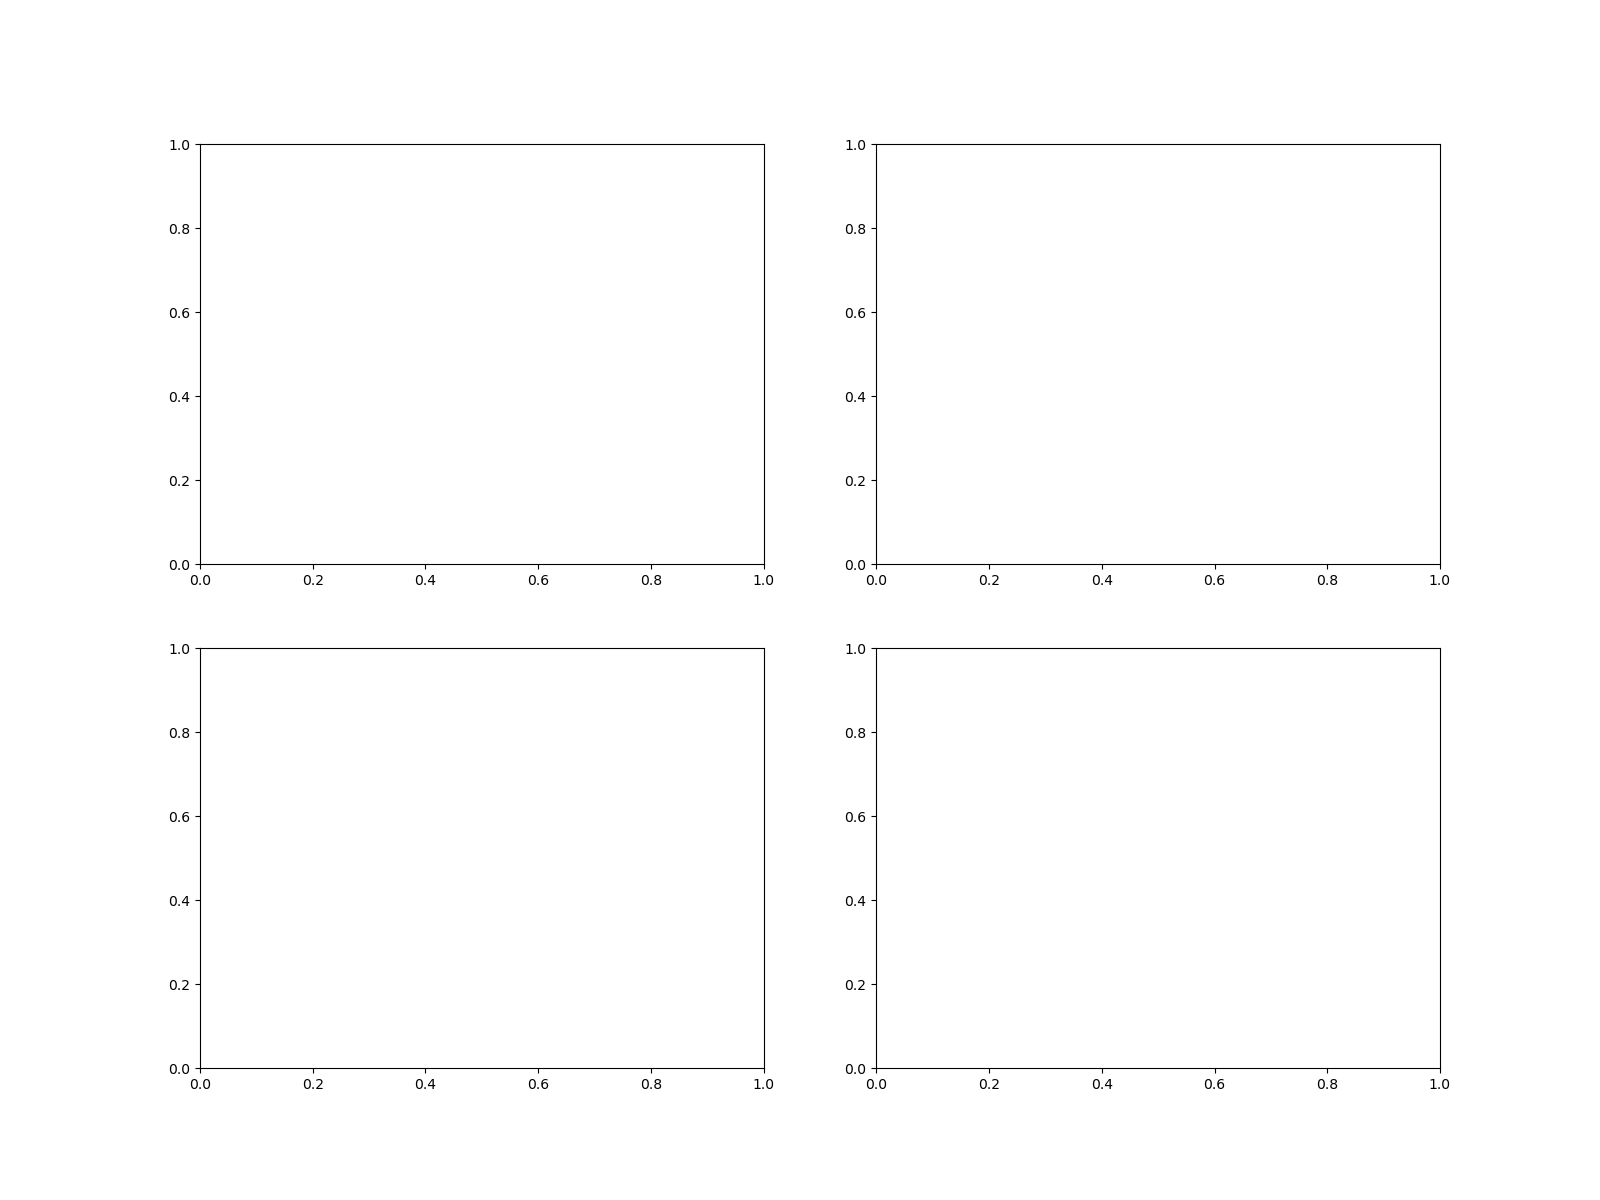

In [6]:
print("Setting up data arrays...")
fig, axs = plt.subplots(2,2, figsize=(16, 12))
ims = np.array([[None,None],[None,None]])
cb = np.array([[None,None],[None,None]])

In [7]:
print("Setting up initial plot...")
ims[0,0] = axs[0,0].pcolormesh(X, Y, b[-1], cmap='jet')
ims[0,1] = axs[0,1].pcolormesh(X, Y, w[-1], cmap='bwr')
ims[1,0] = axs[1,0].pcolormesh(X, Y, N2t[-1], cmap='bwr')
ims[1,1] = axs[1,1].pcolormesh(X, Y, zeta[-1], cmap='bwr')

cb[0,0] = plt.colorbar(ims[0,0],ax=axs[0,0])
cb[0,1] = plt.colorbar(ims[0,1],ax=axs[0,1])
cb[1,0] = plt.colorbar(ims[1,0],ax=axs[1,0])
cb[1,1] = plt.colorbar(ims[1,1],ax=axs[1,1])

ims[0,0].set_clim(0, 0.5)
ims[0,1].set_clim(-0.0005, 0.0005)
ims[1,0].set_clim(-0.1, 0.1)
ims[1,1].set_clim(-0.1, 0.1)

fig.suptitle("time = 0 secs")
for a in axs.ravel():
    a.set_ylabel("$z$")
    a.set_xlabel("$x$")

    a.set_ylim(0, 3*md['H'])

    a.set_aspect(1)

axs[0,0].set_title(r"$b$")
axs[0,1].set_title(r"$w$")
axs[1,0].set_title(r"$\partial_{zt}b$")
axs[1,1].set_title(r"$\zeta$")

def animate(step):
    ims[0,0].set_array(b[step].ravel())
    ims[0,1].set_array(w[step].ravel())
    ims[1,0].set_array(N2t[step].ravel())
    ims[1,1].set_array(zeta[step].ravel())
    fig.suptitle("time = {0:.2f} secs".format(times[step]))

    return ims.flatten(),

Setting up initial plot...


Initialising mp4 writer...
Starting plot...


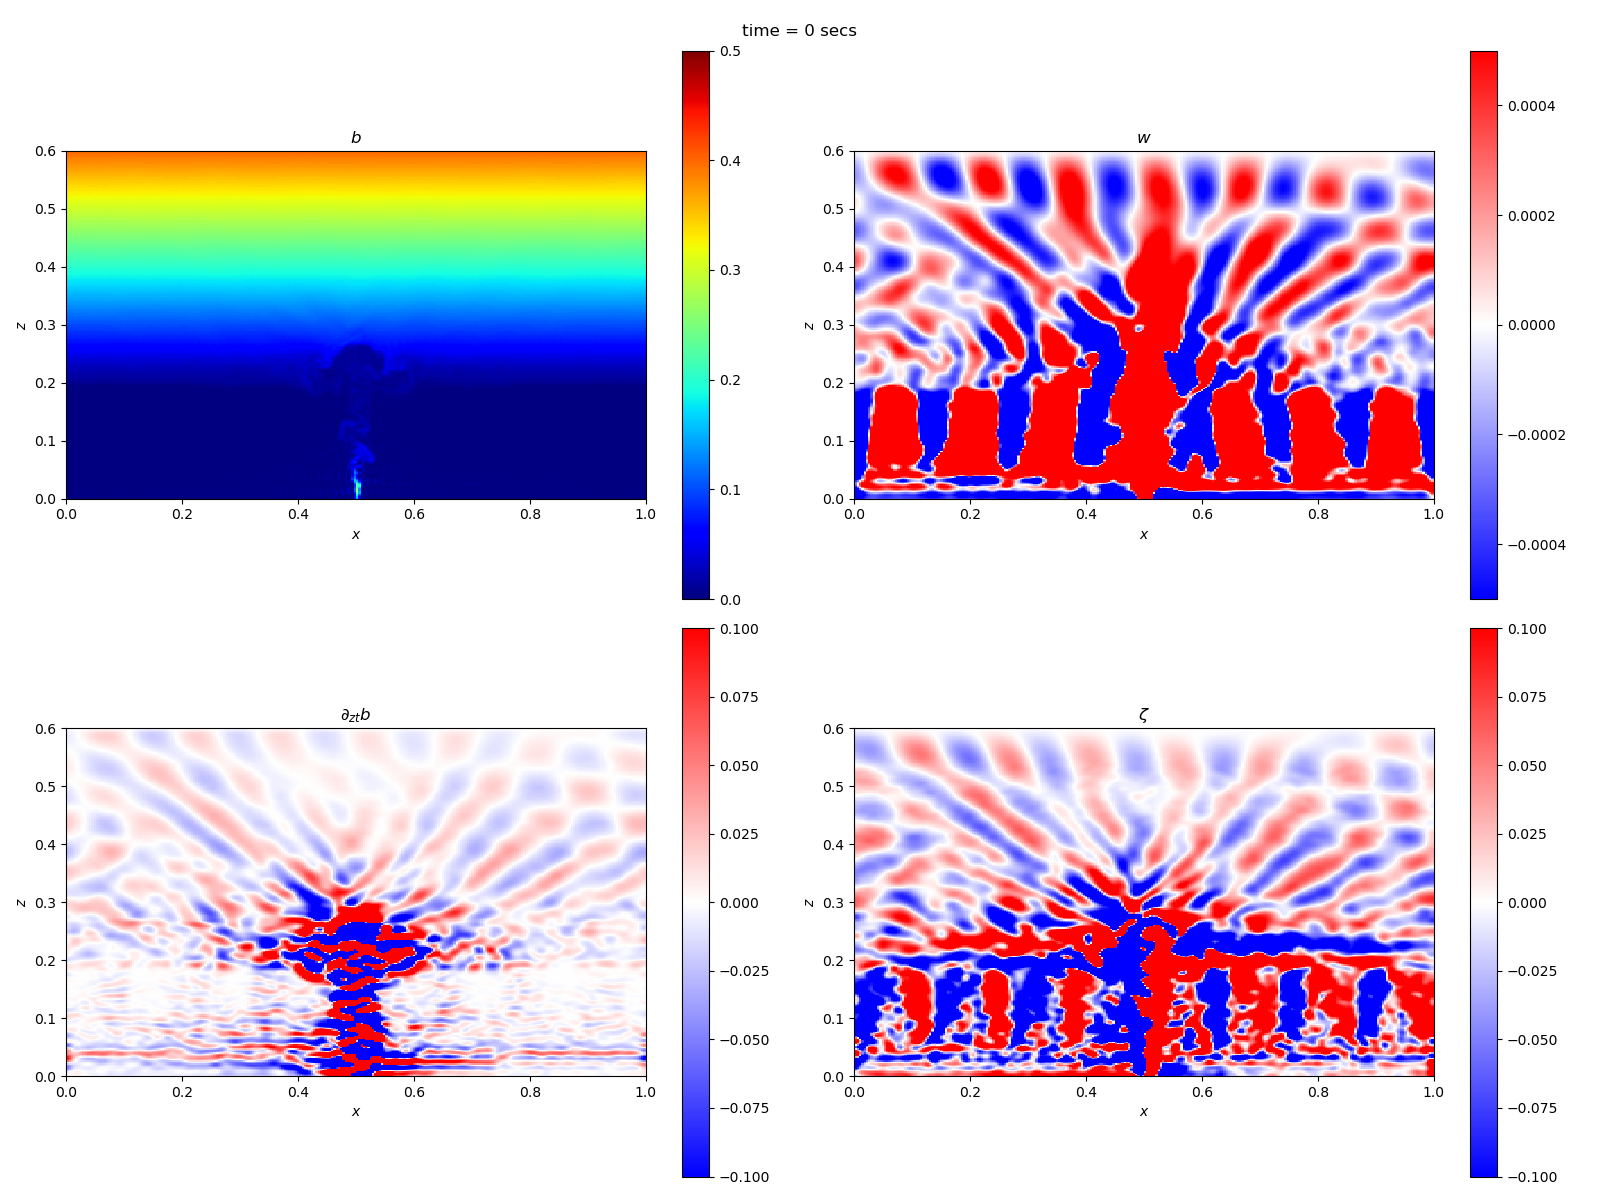

In [8]:
print("Initialising mp4 writer...")
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, bitrate=1800)

print("Starting plot...")
anim = animation.FuncAnimation(fig, animate, interval=1000*md['SAVE_STATS_DT_FINE'], frames=NSAMP, repeat=True)
now = datetime.now()

plt.tight_layout()
plt.show()

In [9]:
print(b.shape)

(312, 257, 256)


In [10]:
#save_fig(anim, '/home/cwp29/tmp/waves.mp4', anim=True, dpi=300)